## Q-learning (3 points)

This notebook will guide you through implementation of vanilla Q-learning algorithm.

You need to implement QLearningAgent (follow instructions for each method) and use it on a number of tests below.

In [710]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash

    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [711]:
import numpy as np
import matplotlib.pyplot as plt

from qlearning_agent import QLearningAgent

%matplotlib inline


In [712]:
import gym
env = gym.make("CartPole-v0")

n_actions = env.action_space.n
n_actions

2

In [713]:
s = env.reset()
print(s.shape)
print(type(s))
# print(s)
# print(np.delete(s, 0))
# print(s)
# s = np.delete(s, 0)
# print(s)

(4,)
<class 'numpy.ndarray'>


In [714]:
import math 
def play_and_train_on_episode(env, agent, t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()
    
    turns = 0
    
    for t in range(t_max):
        turns += 1
        # get agent to pick action given state s.
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)

        # train (update) agent for state s
#         r *= (1 - s[1]*s[1])

#         r -= np.sqrt(abs(s[1])) + np.sqrt(abs(s[2])) + abs(s[0]/10)
        r -= abs(s[0]/10) + abs(s[1]/10) + 5*np.sqrt(abs(s[2])) + np.sqrt(abs(s[3]))
#         r -= (s[0]/2 - s[2])**2 + 0.1*(s[1] - s[3])**2
#         r -= abs(s[2]*5 - s[3]) # + abs(s[0]/10)
#         r -= abs(s[2])*10 + (s[1] - s[3])**2 + abs(s[0]/10)

#         r -= (np.sqrt(abs(s[2])) + np.sqrt(abs(s[3])) + abs(s[1]/10))
        
#         r -= (np.sqrt(abs(s[2])) + abs(s[0]))
#         r -= (np.sqrt(abs(s[2])) + abs(s[0]/10))
#         r -= np.sqrt(abs(s[1]))
#         r -= np.sqrt(abs(s[2]))
    
#         r -= (abs(s[1]) + abs(s[2]))
        agent.update(s, a, r, next_s)

        s = next_s
        total_reward += r
        if done:
#             print(s, a)
            break

    return total_reward, turns

In [715]:
env
# agent

<TimeLimit<CartPoleEnv<CartPole-v0>>>

In [716]:
from gym.core import ObservationWrapper, RewardWrapper


class Binarizer(ObservationWrapper):
    def observation(self, state):
        # Hint: you can do that with round(x, n_digits).
        # You may pick a different n_digits for each dimension.
        # ['Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Velocity At Tip']
        
#         state = np.delete(state, 0)
#         state[0] = np.round(state[0], 1)
#         state[1] = np.round(state[1], 1)
#         state[2] = np.round(state[2], 1) 
        
        state[0] = np.round(state[0], 1)
        state[1] = np.round(state[1], 1)
        state[2] = np.round(state[2], 1)
        state[3] = np.round(state[3], 1)

        return tuple(state)

In [717]:
# class TransformReward(RewardWrapper):
    

In [718]:
env = Binarizer(gym.make('CartPole-v0').env)

In [719]:
agent = QLearningAgent(
    alpha=0.3, epsilon=0.4, discount=0.99,
    get_legal_actions=lambda s: range(n_actions))

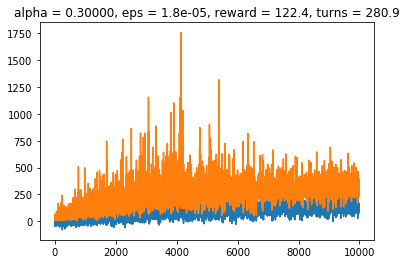

In [720]:
from IPython.display import clear_output

rewards = []
turns = []
for i in range(10000):
    result = play_and_train_on_episode(env, agent)
    rewards.append(result[0])
    turns.append(result[1])
    agent.epsilon *= 0.999
#     agent.alpha -= 0.0001

    if i % 10 == 0:
        clear_output(True)
        plt.title('alpha = {:.5f}, eps = {:.1e}, reward = {:.1f}, turns = {:.1f}'.format(agent.alpha, agent.epsilon, np.mean(rewards[-10:]), np.mean(turns[-10:])))
        plt.plot(rewards)
        plt.plot(turns)
        plt.show()

In [721]:
s = env.reset()

done = False
while not done:
    env.render()
    a = agent.get_best_action(s)   
    new_s, r, done, info = env.step(a)
    print(s, a)
    s = new_s
print(s, a)    

(0.0, -0.0, 0.0, 0.0) 0
(0.0, -0.2, 0.0, 0.3) 1
(0.0, -0.0, 0.0, 0.0) 0
(0.0, -0.2, 0.0, 0.3) 1
(0.0, -0.0, 0.1, 0.1) 1
(0.0, 0.1, 0.1, -0.2) 1
(0.0, 0.3, 0.0, -0.5) 0
(0.0, 0.1, 0.0, -0.2) 0
(0.0, -0.1, 0.0, 0.1) 1
(0.0, 0.1, 0.0, -0.2) 0
(0.0, -0.1, 0.0, 0.2) 1
(0.0, 0.1, 0.0, -0.1) 0
(0.0, -0.1, 0.0, 0.2) 1
(0.0, 0.1, 0.0, -0.1) 0
(0.0, -0.1, 0.0, 0.2) 1
(0.0, 0.1, 0.0, -0.1) 0
(0.0, -0.1, 0.0, 0.2) 1
(0.0, 0.1, 0.0, -0.1) 0
(0.0, -0.1, 0.0, 0.2) 1
(0.0, 0.1, 0.0, -0.0) 1
(0.0, 0.3, 0.0, -0.3) 0
(0.0, 0.1, 0.0, -0.0) 1
(0.0, 0.3, 0.0, -0.3) 0
(0.1, 0.1, 0.0, 0.0) 1
(0.1, 0.3, 0.0, -0.3) 0
(0.1, 0.1, 0.0, 0.0) 1
(0.1, 0.3, 0.0, -0.2) 0
(0.1, 0.1, 0.0, 0.1) 1
(0.1, 0.3, 0.0, -0.2) 0
(0.1, 0.1, 0.0, 0.1) 1
(0.1, 0.3, 0.0, -0.2) 0
(0.1, 0.1, 0.0, 0.1) 1
(0.1, 0.3, 0.0, -0.2) 0
(0.1, 0.1, 0.0, 0.1) 1
(0.1, 0.3, 0.0, -0.2) 0
(0.1, 0.1, 0.0, 0.1) 1
(0.1, 0.3, 0.0, -0.2) 0
(0.1, 0.1, 0.0, 0.1) 1
(0.1, 0.3, 0.0, -0.2) 0
(0.1, 0.1, 0.0, 0.1) 1
(0.1, 0.3, 0.0, -0.1) 0
(0.1, 0.1, 0.0, 0.2) 1
(0

In [722]:
(0.28, -1.1, 0.23, 2.2)
(-0.02, -0.2, 0.22, 1.0)
(0.02, -0.3, 0.23, 1.2) 0

SyntaxError: invalid syntax (<ipython-input-722-06ec600afb0b>, line 3)